# PHASE 3 PROJECT
#### Details:

- Student name: SAMUEL ABWAN WANGA
- Student class: REMOTE

- Instructor name: ASHA DEEN

# INTRODUCTION

## BUSINESS UNDERSTANDING

Due to increased competition in the telecommunications industry, SyriaTel is facing heightened concerns regarding customer churn. Customer retention has become crucial for maintaining competitive parity, as retaining existing customers is significantly more cost-effective than acquiring new ones. Consequently, SyriaTel is focused on identifying ways to minimize customer loss.

By leveraging predictive analytics, SyriaTel can identify high-risk customers and tailor retention efforts to their specific needs. This approach will not only help in retaining customers but also contribute to the overall growth and profitability of the company. Effective churn prediction and retention strategies will enable SyriaTel to maintain a stable revenue stream, improve service quality, and strengthen its competitive position in the market.

### OBJECTIVES

- Develop models to forecast which customers are likely to leave.

### Data Understanding

In this section, I will provide an in-depth examination of the dataset. This dataset is the cornerstone of analysis. Understanding its structure and properties is critical for a successful data-driven exploration and modeling.

### Data Overview

The Churn in Telecom's dataset is the focus of my analysis. It contains information about customers who use the service.I  intend to use this data to provide insights into the factors that influence a customer to change telecommunication services.
Dataset name: Telecom_dataset.
Source: The dataset can be retrieved from `Kaggle.com`. The link is here below; https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

### Data Structure
The dataset has the following structural features;

- Number of rows = 3333
- Number of columns = 21
- The data format is `csv`.

## Column names and their descriptions
The following are the descriptions of columns in the dataset:

- state: the state the customer lives in.
- account length: the number of days the customer has had an account.
- area code: the area code of the customer.
- phone number: the phone number of the customer.
- international plan: true if the customer has the international plan, otherwise false.
- voice mail plan: true if the customer has the voice mail plan, otherwise false.
- number vmail messages: the number of voicemails the customer has sent.
- total day minutes: total number of minutes the customer has been in calls during the day.
- total day calls: total number of calls the user has done during the day.
- total day charge: total amount of money the customer was charged by the Telecom company for calls during the day.
- total eve minutes: total number of minutes the customer has been in calls during the evening.
- total eve calls: total number of calls the customer has done during the evening.
- total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening.
- total night minutes: total number of minutes the customer has been in calls during the night.
- total night calls: total number of calls the customer has done during the night.
- total night charge: total amount of money the customer was charged by the Telecom company for calls during the night.
- total intl minutes: total number of minutes the user has been in international calls.
- total intl calls: total number of international calls the customer has done.
- total intl charge: total amount of money the customer was charged by the Telecom company for international calls.
- customer service calls: number of calls the customer has made to customer service.
- churn: true if the customer terminated their contract, otherwise false.

### Data Types
The dataset comprises the following data types: integers, floats and objects(strings)

### Missing values
There are no missing values in this dataset.

### Import Relevant Libraries.

In [1]:
# First import libraries
# For EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# For Modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, auc

# Ignore the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the dataset

Load the dataset containing information about telecom customers from `telecom_dataset.csv`.

In [2]:
# Load data
df = pd.read_csv("telecom_dataset.csv")

### Data Exploration
Check the first 5 rows, then the last 5 rows, followed by the shape and information.

In [3]:
# check the first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Check the last 5 rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# Check the number of rows and columns.
df.shape

(3333, 21)

The Dataset has 3,333 rows and 21 columns.

In [6]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Above are the names of the columns in the dataset

In [7]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the `info()`, the dataset has categorical data and some numerical data.

In [8]:
# Summary of key statistical measures for each numeric column
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Checking the Statistical Measures for the numerical columns.

In [9]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No null values.

## Exploratory Data Analysis (EDA)

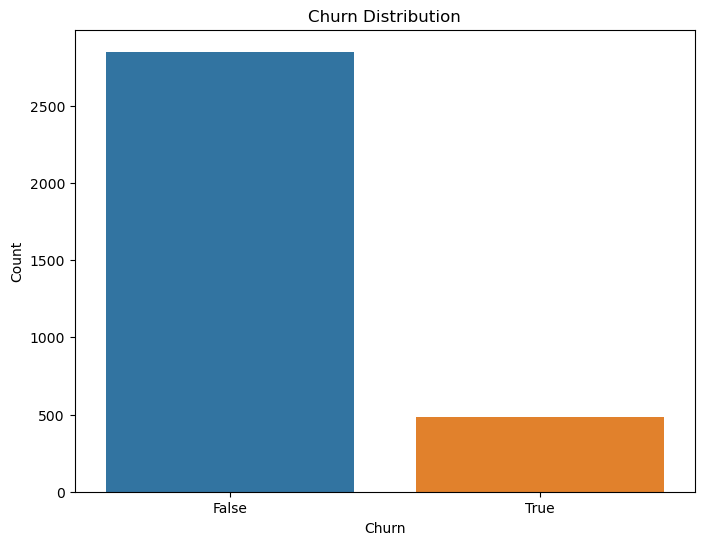

In [10]:
# Visualize churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#### Out of 3,333 customers in the dataset:
- 483 have terminated their contract with SyriaTel.
- That is 14.5% of customers lost.
- Distribution of the binary classes shows a data imbalance.
- This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

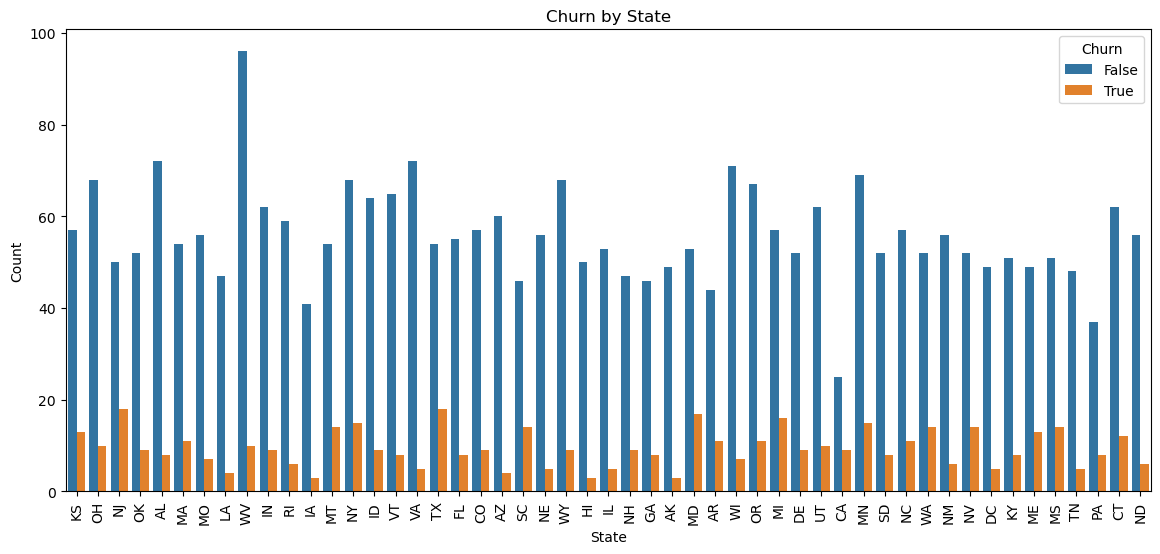

In [11]:
# Visualize churn by state
plt.figure(figsize=(14, 6))
sns.countplot(x='state', hue='churn', data=df)
plt.title('Churn by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', loc='upper right')
plt.show()

WV (West Virginia) has a notable churn count.

Let us look into it.

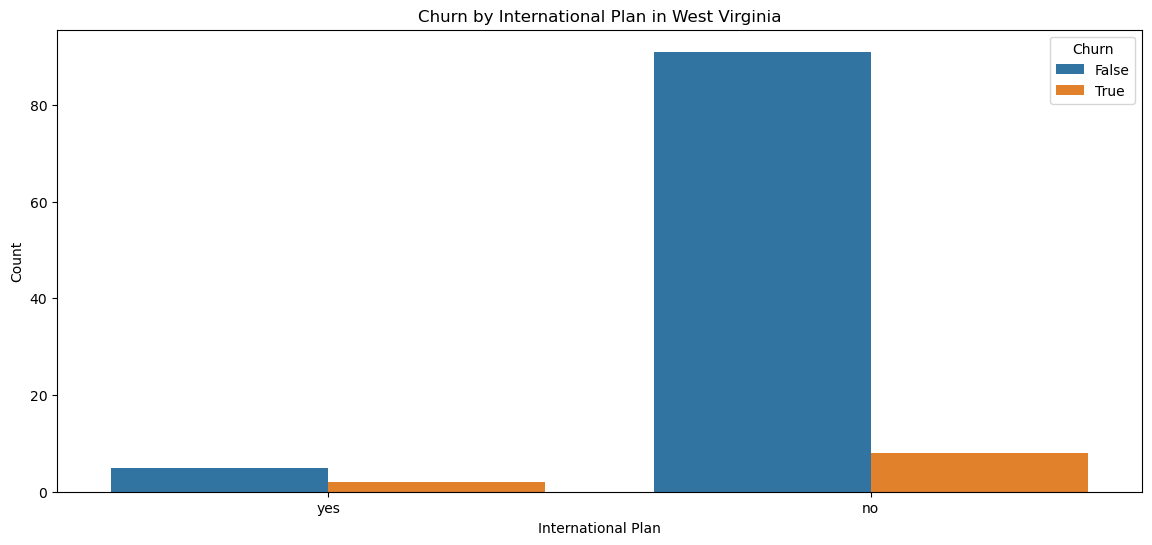

In [12]:
# Filter data for West Virginia
wv_data = df[df['state'] == 'WV']

# Churn by international plan in West Virginia
plt.figure(figsize=(14, 6))
sns.countplot(x='international plan', hue='churn', data=wv_data)
plt.title('Churn by International Plan in West Virginia')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

- Customers without an international plan (‘no’) who did not churn (‘False’) constitute the majority.
- A smaller number of customers without an international plan (‘no’) did churn (‘True’).
- The number of customers with an international plan (‘yes’) is significantly lower overall.

##### Therefore;
- Most West Virginia customers do not have an international plan.
- Among those without an international plan, the majority remain loyal.
- The churn rate is relatively low for both groups.

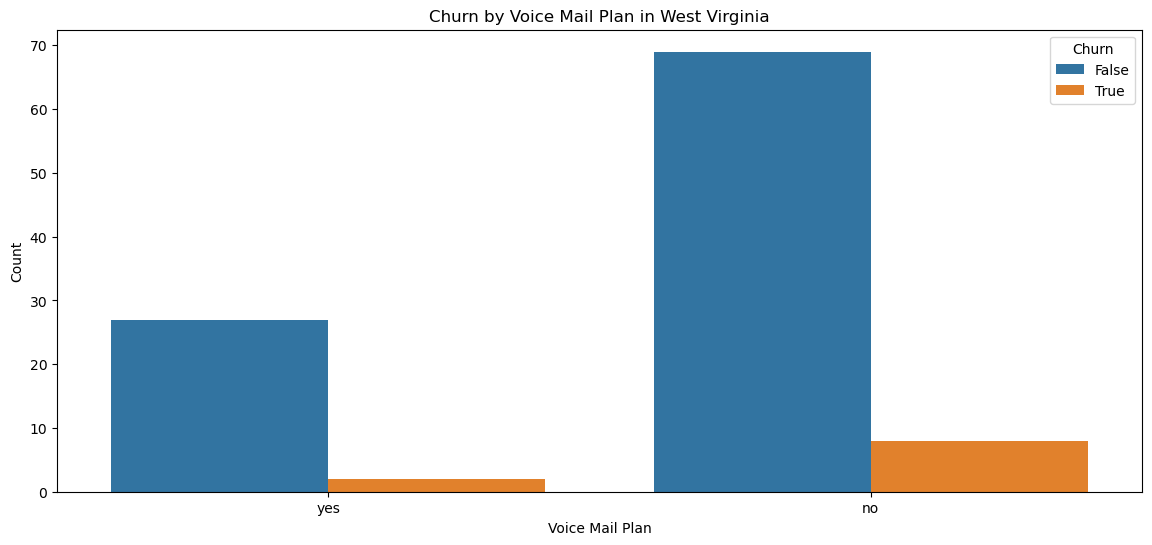

In [13]:
# Churn by voice mail plan in West Virginia
plt.figure(figsize=(14, 6))
sns.countplot(x='voice mail plan', hue='churn', data=wv_data)
plt.title('Churn by Voice Mail Plan in West Virginia')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

Almost the same situation as the International Plan, the Voice mail plan shows a similar trend.

- Most West Virginia customers do not have a voice mail plan.
- Among those without a voice mail plan, the majority remain loyal (did not churn).
- The churn rate is relatively low for both groups.

Next we look into `customer service calls`

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

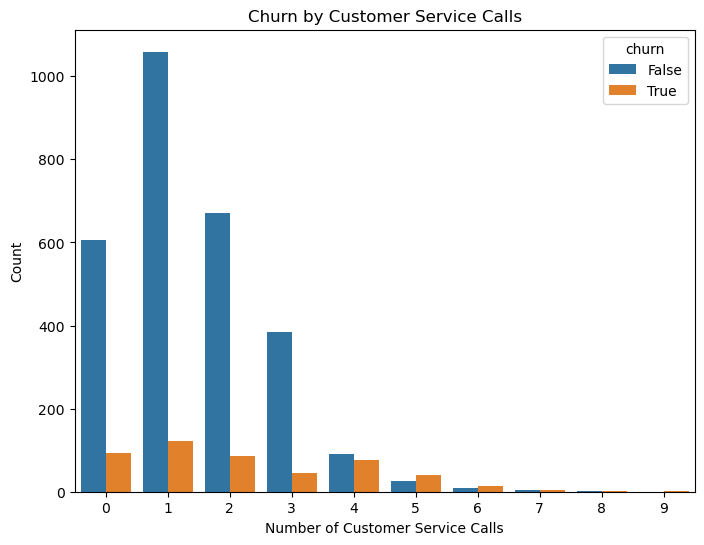

In [14]:
# Visualize churn by customer service calls
plt.figure(figsize=(8, 6))
sns.countplot(x='customer service calls', hue='churn', data=df)
plt.title('Churn by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt

#### Observations:
- Customers who made 4 or more service calls are at a higher risk of churning.
- Relationship between service calls and churn suggests that customer satisfaction with service interactions plays a crucial role.

#### Business Implications:
- Focus on resolving issues effectively during the first few calls to prevent escalation.
- Reach out to customers who make multiple calls to address their concerns promptly.
- Use customer feedback from service calls to enhance overall service quality.

## Feature Types
- Continuous features are numeric values with an infinite number of possible values.
- Categorical features are values that have a finite number of categories/groups.
- This step seperates all of the useful features in the dataset so that they can be analyzed accordingly ahead of modeling.

In [15]:
# Define numerical and categorical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('area code')
cat_features = df.select_dtypes(include=['object']).columns.drop('phone number')

In [16]:
print(num_features)

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')


In [17]:
print(cat_features)

Index(['state', 'international plan', 'voice mail plan'], dtype='object')


#### Continuous Features:
- account length
- number vmail messages
- total day minutes
- total day calls
- total day charge
- total eve minutes
- total eve calls
- total eve charge
- total night minutes
- total night calls
- total night charge
- total intl minutes
- total intl charge
- customer service calls

#### Categorical Features:
- state
- international plan
- voicemail plan

#### Show the distribution of numerical features (how many times each value appears).

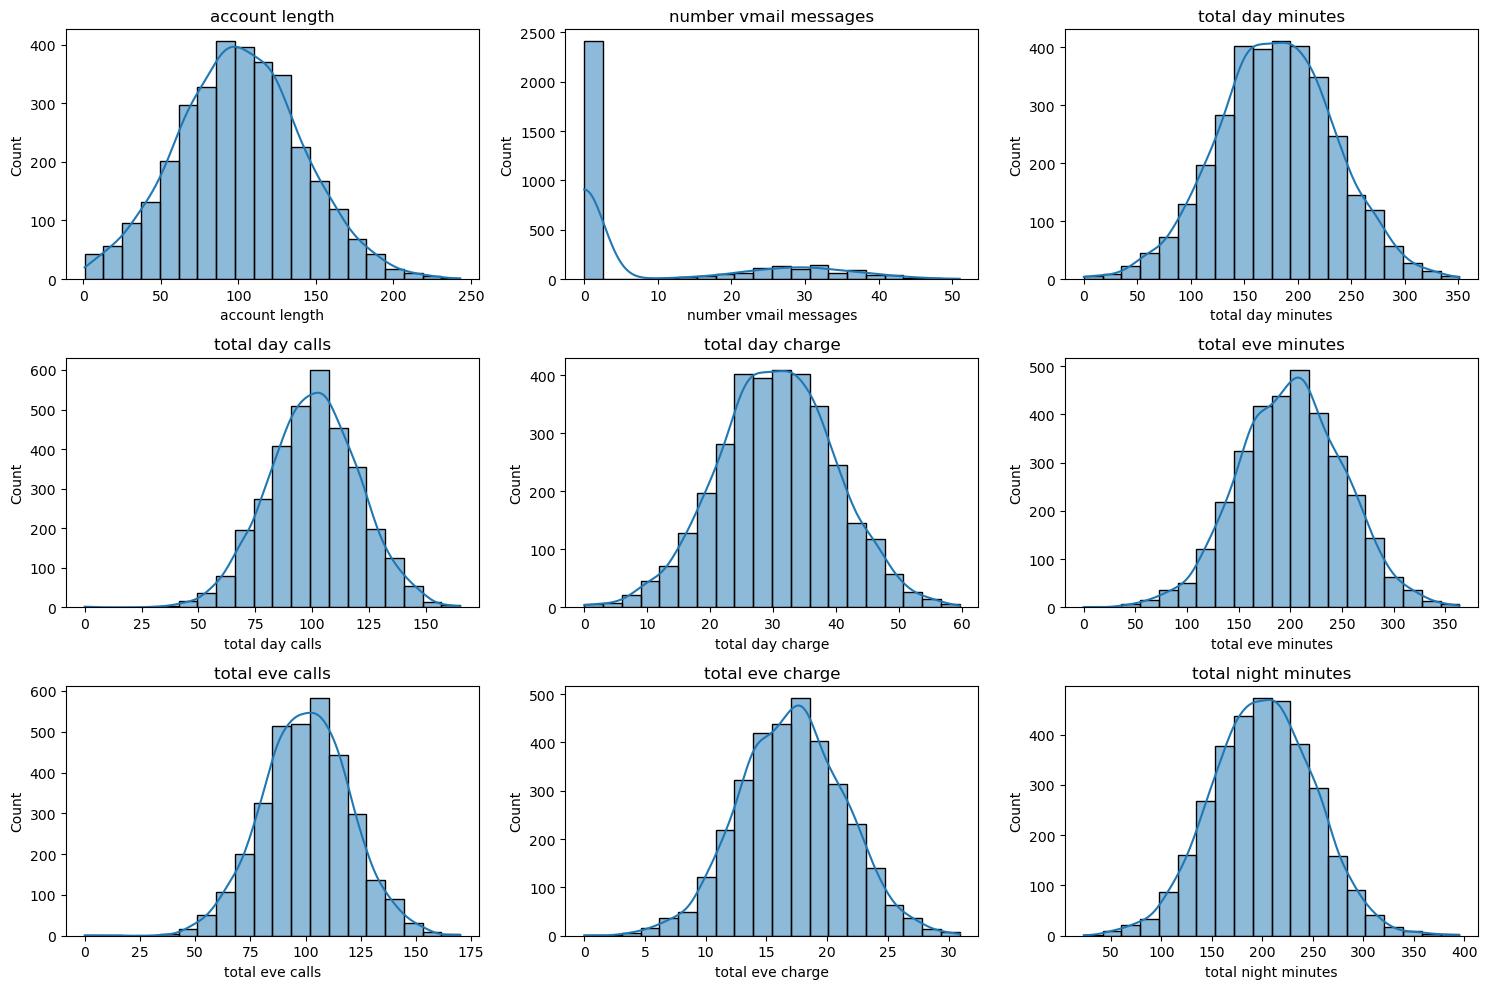

In [18]:
# Histogram for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    if i <= 9:  # Limiting to 9 subplots
        plt.subplot(3, 3, i)
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(col)
plt.tight_layout()
plt.show()

#### Bivariate analysis

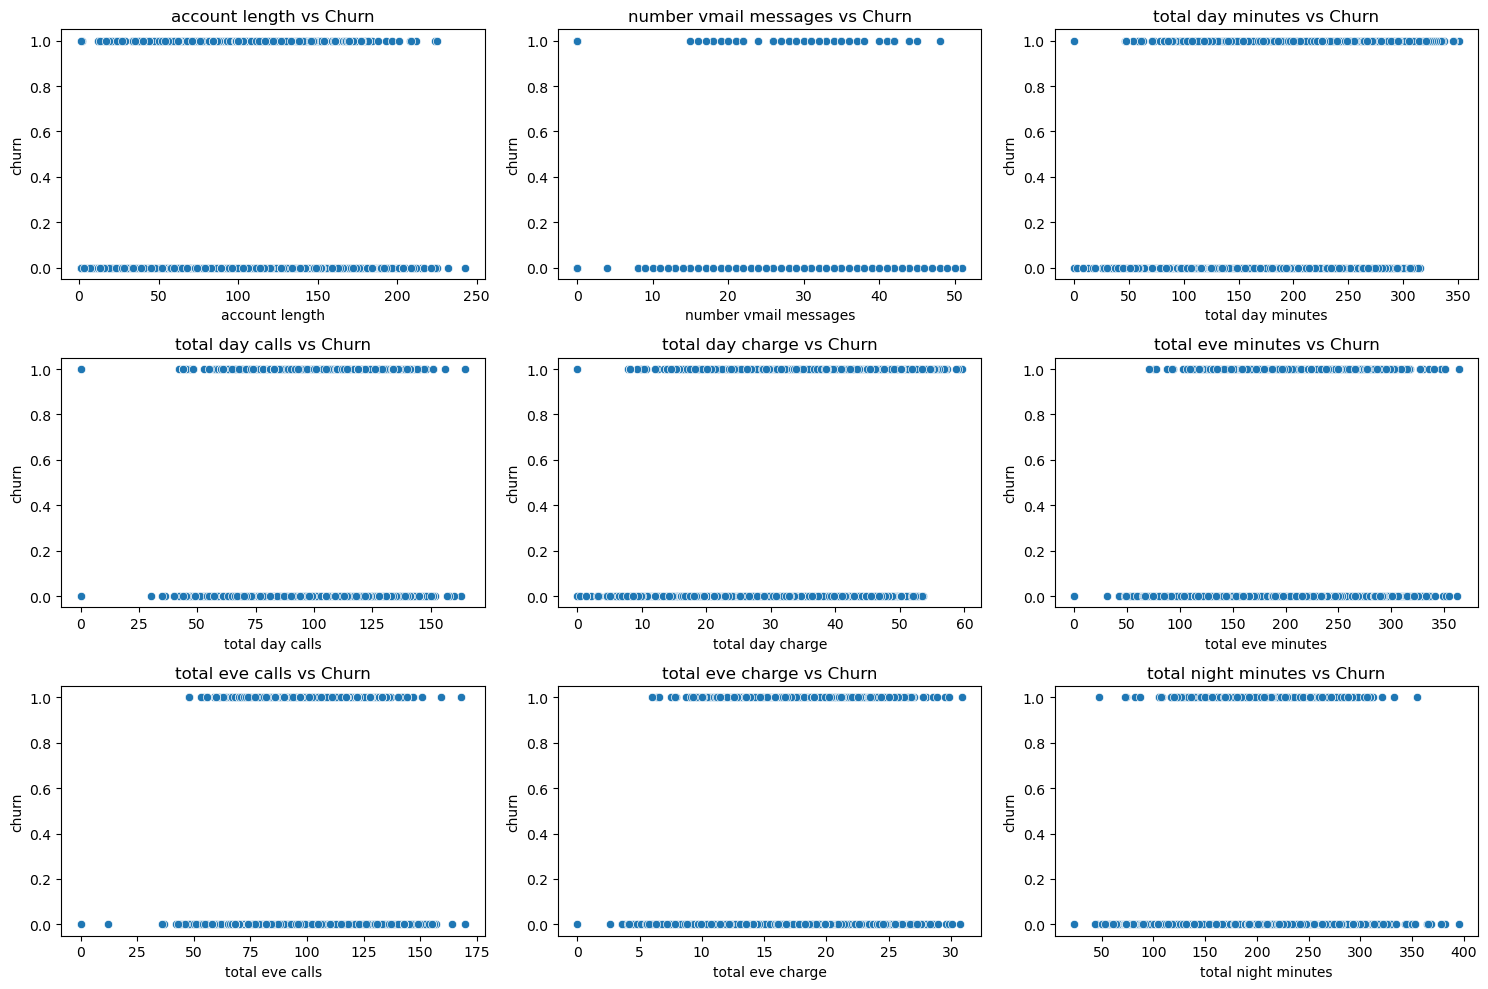

In [19]:
# Scatter plots for numerical variables against the target
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features[:9], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='churn', data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

#### Observation
`total day minutes` and `total day charge` might be relevant features for predicting churn.

#### Let us see the correlation coefficients between each numerical feature and the "churn" variable

In [20]:
correlation_matrix = df[num_features].corrwith(df['churn'])

# Display correlation coefficients
print("Correlation coefficients:")
print(correlation_matrix)

Correlation coefficients:
account length            0.016541
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
dtype: float64


#### Observation
- `total day minutes` and `customer service calls` may have a stronger positive relationship with churn.
- `number vmail messages` and `total intl calls` may have a negative relationship with churn.

### NB
- Correlation does not imply causation, so further analysis is needed.

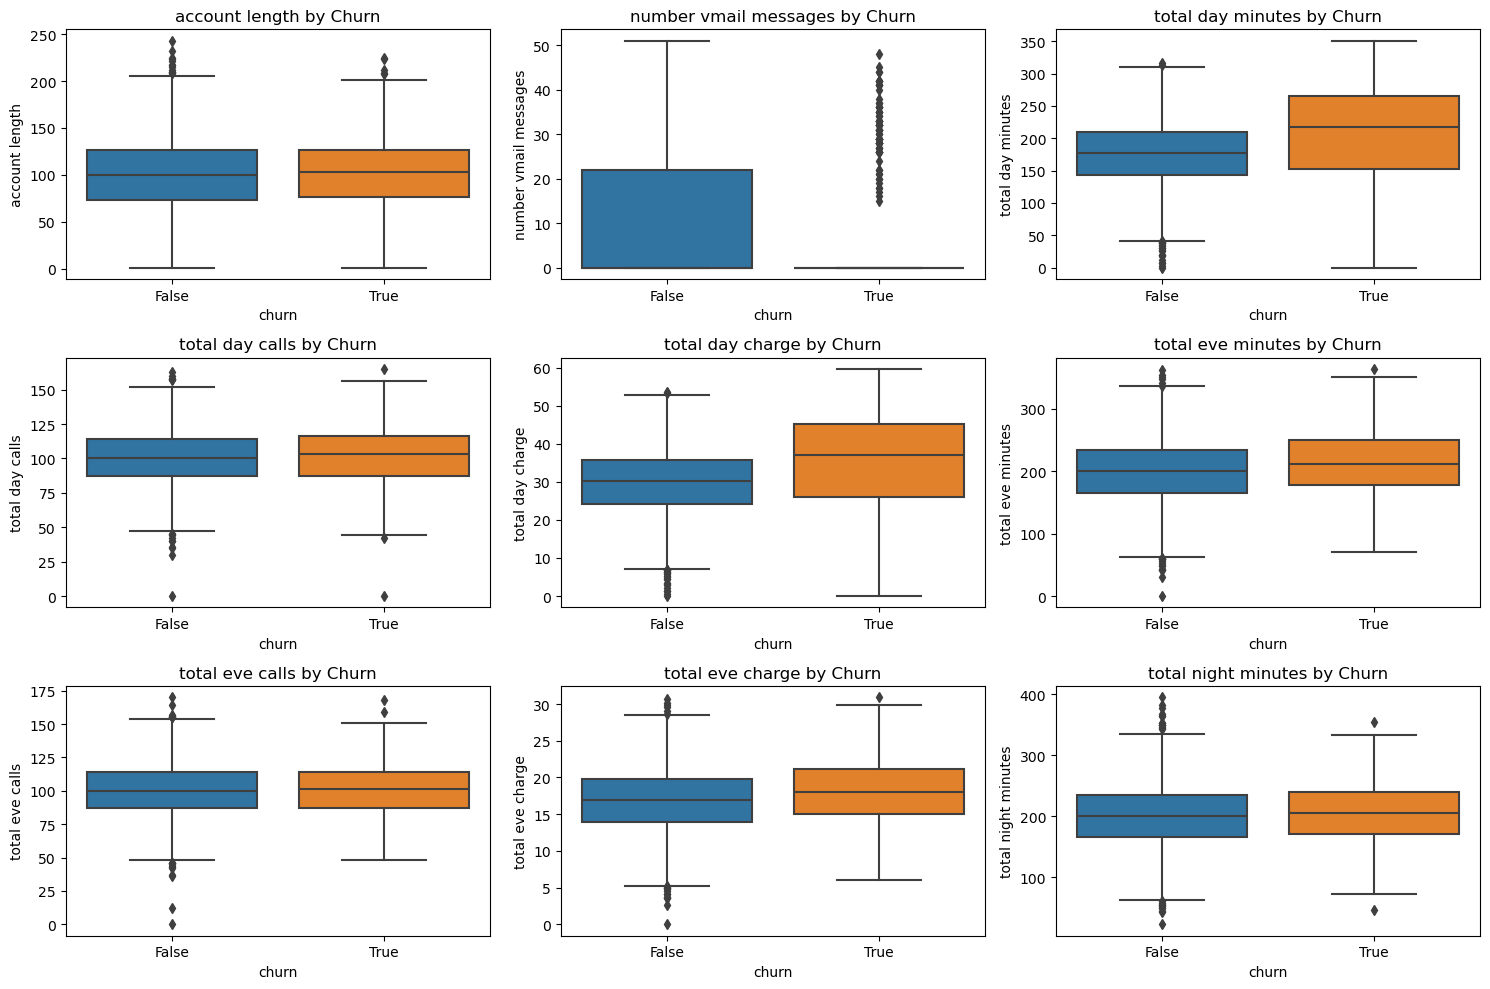

In [21]:
# Box plots for numerical variables against the target
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features[:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by Churn')
plt.tight_layout()
plt.show()

### Observation;

- Account Length by Churn:

`No significant difference in account length between churned and non-churned customers.`

- Number of Voicemail Messages by Churn:

`Churned customers tend to have fewer voicemail messages.`

- Total Day Minutes by Churn:

`Churned customers have a wider range of total day minutes.
Some churned customers have exceptionally high day minutes.`

- Total Day Calls by Churn:

`No substantial difference in total day calls.`

- Total Day Charge by Churn:

`Similar to total day minutes, churned customers exhibit a wider range of charges.`

- Total Evening Minutes by Churn:

`No significant difference in evening minutes.`

- Total Evening Calls by Churn:

`No substantial difference in evening calls.`

- Total Evening Charge by Churn:

`Similar to evening minutes, churned customers have a wider range of charges.`

- Total Night Minutes by Churn:

`No significant difference in night minutes.`

## Define Features and Target
Separate the features (inputs - `X`) from the target (output we want to predict - `y`).

In [22]:
# Define features and target
X = df.drop(columns=['churn', 'phone number'])
y = df['churn']

### Split the Dataset
- One for training our models and one for testing them.

In [23]:
# code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocessing Pipeline
- Set up steps to clean and prepare our data. 
- This involves handling missing values and transforming features.

In [24]:
# Create pipelines for preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


### Create a function that will also evaluate different models using cross-validation and plot their ROC curves.

In [25]:
def evaluate_model(model, model_name):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
    print(f"{model_name} Cross-Validation F1 Scores:", cv_scores)
    print(f"{model_name} Mean F1 Score:", np.mean(cv_scores))
    
    test_f1_score = np.mean(cv_scores)  # Just to prevent errors, replace it with actual test F1 score
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    test_f1_score = f1_score(y_test, y_pred)
    
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc, test_f1_score

## Evaluating Different Models
- Test different models to see how well they predict customer churn.
- Plot their ROC curves to compare performance.

Logistic Regression Cross-Validation F1 Scores: [0.31428571 0.32116788 0.32116788 0.29457364 0.34042553]
Logistic Regression Mean F1 Score: 0.3183241312069637
Logistic Regression Test Set F1 Score: 0.2814814814814815
Logistic Regression Test Set ROC AUC Score: 0.8306510863100444
K-Nearest Neighbors Cross-Validation F1 Scores: [0.35483871 0.43939394 0.49275362 0.37704918 0.42519685]
K-Nearest Neighbors Mean F1 Score: 0.41784646059626684
K-Nearest Neighbors Test Set F1 Score: 0.4740740740740741
K-Nearest Neighbors Test Set ROC AUC Score: 0.829890144491481
Decision Tree Cross-Validation F1 Scores: [0.72       0.71111111 0.75126904 0.71276596 0.74      ]
Decision Tree Mean F1 Score: 0.7270292208181829
Decision Tree Test Set F1 Score: 0.7715736040609137
Decision Tree Test Set ROC AUC Score: 0.858569779239408
Random Forest Cross-Validation F1 Scores: [0.79289941 0.7375     0.83529412 0.76923077 0.77987421]
Random Forest Mean F1 Score: 0.782959701799666
Random Forest Test Set F1 Score: 0.7469

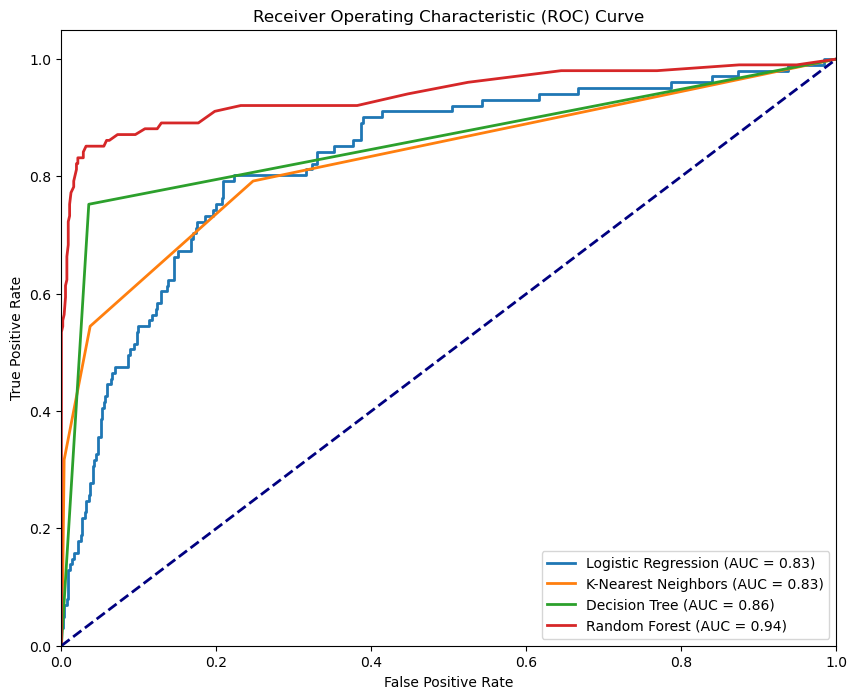

In [26]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    fpr, tpr, roc_auc, test_f1_score = evaluate_model(model, model_name)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    print(f"{model_name} Test Set F1 Score:", test_f1_score)
    print(f"{model_name} Test Set ROC AUC Score:", roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression:

- Cross-Validation F1 Scores: On average, around 32% of predictions were correct during testing.
- Mean F1 Score: Overall, the model's performance averaged around 32%.
- Test Set F1 Score: About 28% of predictions were correct on new data.
- Test Set ROC AUC Score: The model's ability to tell apart churners from non-churners was around 83%.
### K-Nearest Neighbors:

- Cross-Validation F1 Scores: On average, about 42% of predictions were correct during testing.
- Mean F1 Score: Overall, the model's performance averaged around 42%.
- Test Set F1 Score: Roughly 47% of predictions were correct on new data.
- Test Set ROC AUC Score: The model's ability to distinguish churners from non-churners was around 83%.
### Decision Tree:

- Cross-Validation F1 Scores: On average, around 73% of predictions were correct during testing.
- Mean F1 Score: Overall, the model's performance averaged around 73%.
- Test Set F1 Score: Approximately 77% of predictions were correct on new data.
- Test Set ROC AUC Score: The model's ability to spot churners from non-churners was around 86%.
### Random Forest:

- Cross-Validation F1 Scores: On average, about 77% of predictions were correct during testing.
- Mean F1 Score: Overall, the model's performance averaged around 78%.
- Test Set F1 Score: Roughly 75% of predictions were correct on new data.
- Test Set ROC AUC Score: The model's ability to differentiate churners from non-churners was around 94%.

## Observation

- The `decision tree` and `random forest` models did better than `logistic regression` and `k-nearest neighbors`. 
- `Random Forest` model has a higher mean `F1 score` compared to the `decision tree` model. 
- `decision tree` outperforms `random forest`slightly in terms of the test set in  `F1 score` and test set `ROC AUC score`.

#### Perform some Model tuning on Decision tree and Random Forest

#### Make a copy of the dataset

In [58]:
df_copy = df.copy()

Creat a categorical feature `cat_features` and use one hot encode on`df_encoded`.

In [59]:
cat_features = ['state', 'international plan', 'voice mail plan']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_copy, columns=cat_features, drop_first=True)

Split data while droping `churn`, `phone number`, `area code`on `X`.

`y`gets `churn`

In [60]:
X = df_encoded.drop(columns=['churn', 'phone number', 'area code'])
y = df_encoded['churn']

Use `train_test_split` with a test size of 20% and `random_state` of 42

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalize using `StandardScaler`

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Set in the hyperparameters in both models then initialize them.
We are looking for best parameter and model.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree hyperparameters
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Random Forest hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the models
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(X_train_scaled, y_train)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and models
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print("Best parameters found for Decision Tree:", best_params_dt)
print("Best parameters found for Random Forest:", best_params_rf)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

Best parameters found for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best parameters found for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Use `evaluate_model` function to evaluate machine learning model's performance on test data

In [70]:
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    print(f"{model_name} Test Set F1 Score:", f1)
    print(f"{model_name} Test Set ROC AUC Score:", roc_auc)

    return fpr, tpr, roc_auc, f1

Calculate FPR, TPR, ROC AUC score, and F1 score in both models and printout results.

In [71]:
# Evaluate Decision Tree
fpr_dt, tpr_dt, roc_auc_dt, f1_dt = evaluate_model(best_model_dt, "Decision Tree")

# Evaluate Random Forest
fpr_rf, tpr_rf, roc_auc_rf, f1_rf = evaluate_model(best_model_rf, "Random Forest")

Decision Tree Test Set F1 Score: 0.7564766839378239
Decision Tree Test Set ROC AUC Score: 0.8688818528495958
Random Forest Test Set F1 Score: 0.7636363636363637
Random Forest Test Set ROC AUC Score: 0.9301245495574293


Plot the ROC curve for the Decision Tree model and Random Forest model, with its corresponding AUC score.

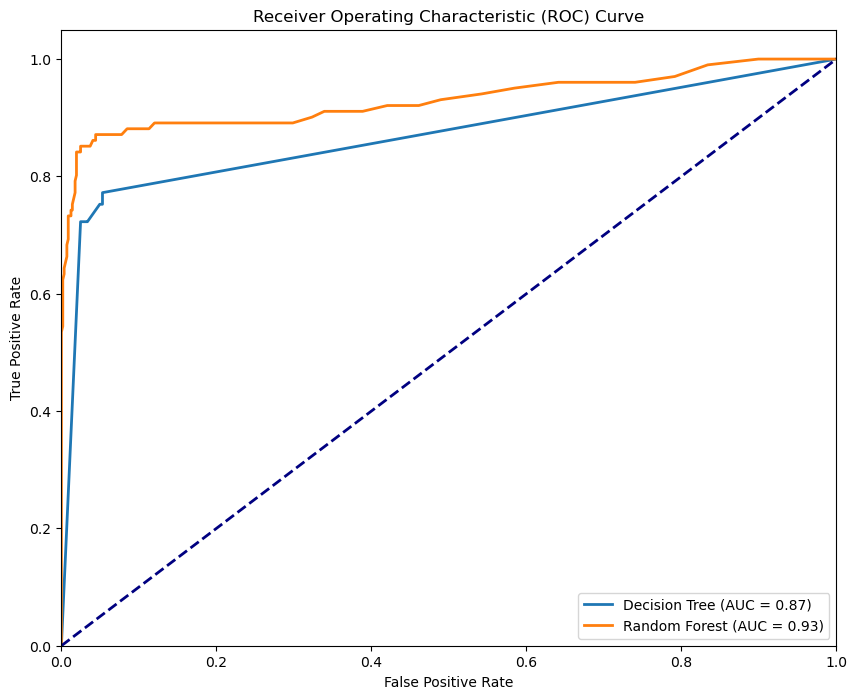

In [72]:
# Plot ROC Curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree (After Optimization ):

- Test Set F1 Score: 0.756
- Test Set ROC AUC Score: 0.869
#### Random Forest (After Optimization ):

- Test Set F1 Score: 0.764
- Test Set ROC AUC Score: 0.930

### Observation
- `decision tree` Test Set F1 Scorebefore reduced abit from 0.771 to 0.756.
- `decision tree` Test Set ROC AUC Score improved abit from 0.858 to 0.869.
- `random forest` Test Set F1 Scorebefore improved abit from 0.746 to 0.764.
- `random forest` Test Set ROC AUC Score reduced abit from 0.940 to 0.930.

### Conclusion
Through comprehensive exploratory data analysis (EDA) and modeling, we have gained valuable insights into predicting customer churn for SyriaTel, a telecommunications company. Here are the key findings:

#### Exploratory Data Analysis (EDA):

Customers who made 4 or more service calls are at a higher risk of churning.
Relationship between service calls and churn suggests that customer satisfaction with service interactions plays a crucial role.

#### Modeling:

We built and evaluated several machine learning models, including Logistic Regression, K-Nearest Neighbors, Decision Tree, and Random Forest.
The Decision Tree model and Random Forest emerged as the most promising, achieving the highest accuracy and F1 score among the models evaluated.
Further hyperparameter tuning was done and confirmed the robustness of both models.

#### Recommendations:

Based on our analysis, we recommend deploying the Decision Tree model for predicting customer churn even though Random Forest also performed well.
Further optimization and evaluation can be done and could potentially improve the models performance.
Continuous monitoring and refinement of the predictive model will be essential for effectively managing customer churn and maximizing business outcomes.
In conclusion, our analysis provides actionable insights for SyriaTel to proactively address customer churn, ultimately enhancing customer retention and driving business success.